## Monte Carlo - Forecasting Stock Prices - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Forecasting Future Stock Prices – continued:

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

ticker = 'MSFT' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2000-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

drift.values
stdev.values

t_intervals = 250
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

***

Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [2]:
S0 = data.iloc[-1]
S0

MSFT    107.220001
Name: 2019-02-05 00:00:00, dtype: float64

Create a variable price_list with the same dimension as the daily_returns matrix. 

In [3]:
price_list = np.zeros_like(daily_returns)
price_list

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [4]:
price_list[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

Set the values on the first row of the price_list array equal to S0.

In [5]:
price_list[0] = S0
price_list

array([[ 107.22000122,  107.22000122,  107.22000122, ...,  107.22000122,
         107.22000122,  107.22000122],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ..., 
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

Create a loop in the range (1, t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t.

In [6]:
for t in xrange(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [7]:
price_list

array([[ 107.22000122,  107.22000122,  107.22000122, ...,  107.22000122,
         107.22000122,  107.22000122],
       [ 110.25922428,  105.84175594,  106.58000762, ...,  102.75682236,
         107.49779998,  106.77059871],
       [ 110.93303511,  105.77357055,  106.47232998, ...,  100.88915881,
         109.12368754,  105.59257866],
       ..., 
       [ 100.72826235,  120.60060623,  115.20816664, ...,  206.28217527,
         102.68210156,   85.5022236 ],
       [ 102.75994415,  122.07352132,  114.76997633, ...,  210.32698256,
         103.11465687,   84.66179496],
       [ 101.47850789,  121.17163706,  115.59095561, ...,  215.41616527,
         104.45660836,   85.38316872]])

Finally, plot the obtained price list data.

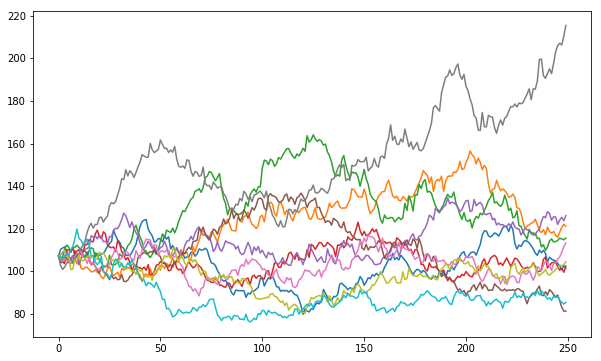

In [8]:
plt.figure(figsize=(10,6))
plt.plot(price_list);